<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Operaciones lógicas y máscaras </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/openCV.jpg" align="middle" style="width:550px;"/></td>
<td>

**OpenCV** es una biblioteca libre desarrollada originalmente por Intel. Vio la luz en el año 1999. Escrita originalmente en C/C++, su mejor virtud es que es multiplataforma, se puede ejecutar en diferentes sistemas operativos (Linux, Windows, Mac OS X, Android e iOS). También la podemos utilizar en diferentes lenguajes de programación como Java, Objective C, C# y *Python*.

Quizás sea la biblioteca de visión artificial más importante y más usada. Es utilizada por universidades, empresas y gente del movimiento Maker para dar rienda suelta a su imaginación al tratarse de un software libre.

En este notebook comenzaremos con el tratamiento de imágenes en Python mediante esta librería, más específicamente vamos a ver como cargar o  leer una imagen, conversión a blanco y negro, filtros y otras operaciones que serán útiles dentro del curso.


   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [37]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# 1. Operaciones lógicas


 ## Implementación de operadores OpenCV AND, OR, XOR y NOT  

<div class="alert alert-info">
 <ul>
  <li>Generar imagenes como las que se muestran a continuación (300 x 300)</li>
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/rectangulo_circulo.png">

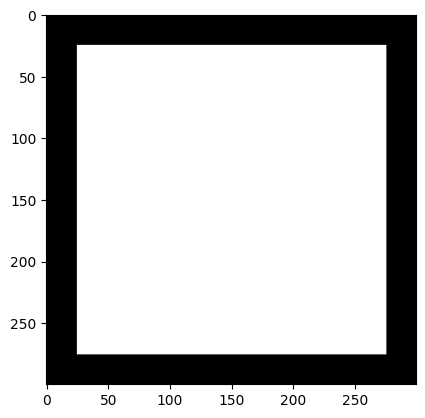

In [38]:
# Rectangulo 
imagen_base =np.zeros( (300,300), dtype='uint8'  )
cv.rectangle(imagen_base, (25,25), (275,275),255,-1)
plt.imshow(imagen_base,cmap='gray')
plt.show()



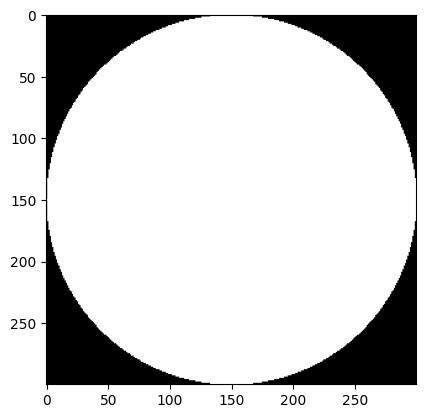

In [39]:
# Circulo
imagen_base_circulo =np.zeros( (300,300), dtype='uint8'  )
cv.circle(imagen_base_circulo, (150,150),150,255,-1)
plt.imshow(imagen_base_circulo,cmap='gray')
plt.show()

<div class="alert alert-info">
 <ul>
  <li>Aplicar operaciones de AND, OR y XOR y NOT</li>
</ul> 


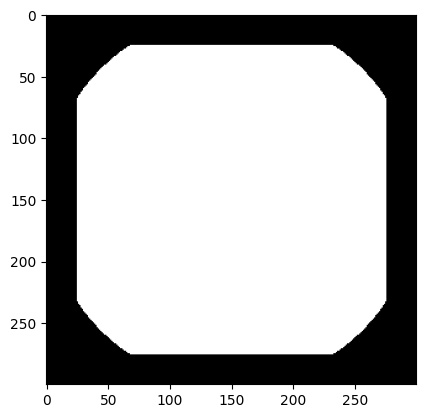

In [40]:
#AND
img_and = cv.bitwise_and(imagen_base,imagen_base_circulo)
plt.imshow(img_and,cmap='gray')
plt.show()

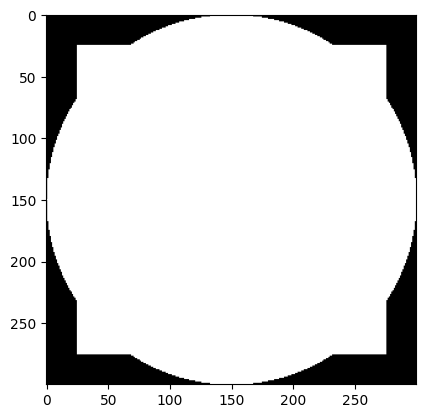

In [41]:
#OR
img_or  = cv.bitwise_or(imagen_base,imagen_base_circulo)
plt.imshow(img_or,cmap='gray')
plt.show()

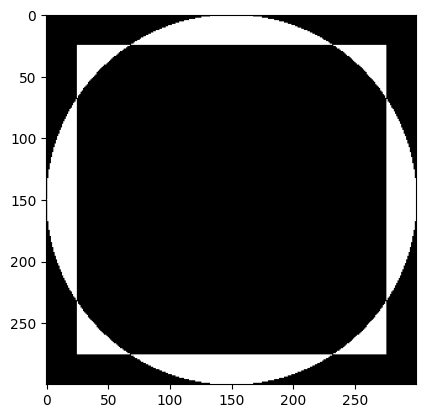

In [42]:
#XOR
img_xor  = cv.bitwise_xor(imagen_base,imagen_base_circulo)
plt.imshow(img_xor,cmap='gray')
plt.show()

<div class="alert alert-info">
 <ul>
  <li>Aplicar la operacón inversa a ambas imagenes</li>
</ul> 

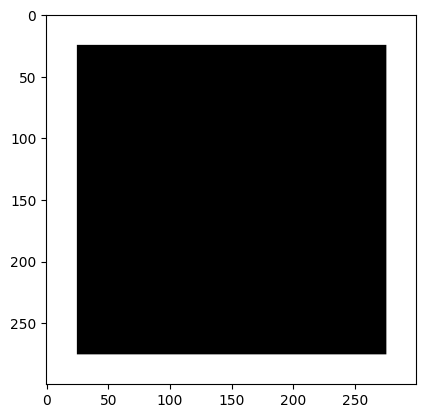

In [43]:
#Rectangulo
imagen_base_inv = cv.bitwise_not(imagen_base)
plt.imshow(imagen_base_inv,cmap='gray')
plt.show()

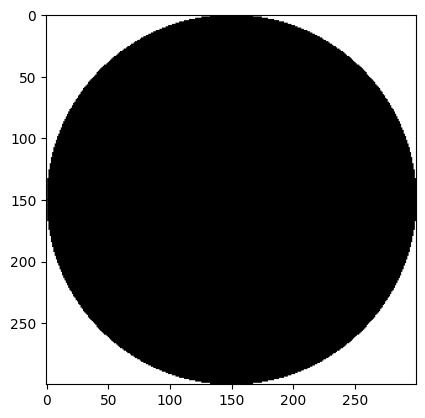

In [44]:
#Circulo
imagen_base_inv_circulo = cv.bitwise_not(imagen_base_circulo)
plt.imshow(imagen_base_inv_circulo,cmap='gray')
plt.show()

# 2. Máscaras

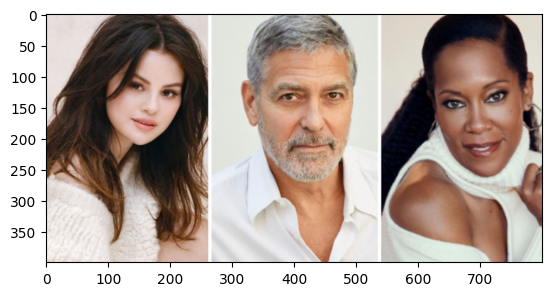

(400, 800, 3)

In [45]:
# Abrir el archivo 'figuras/people.jpg'
img= cv.imread('figuras/people.jpg')
img = cv.cvtColor (img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.shape

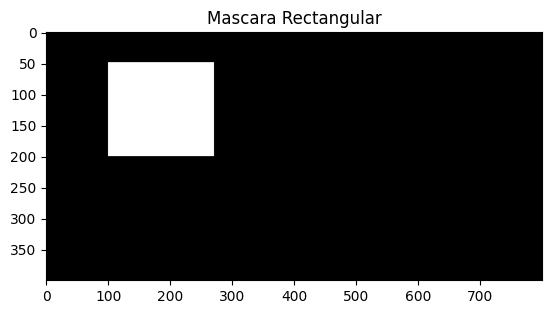

(400, 800, 3)

In [46]:
# Mascara rectangular
mask_rect = np.zeros(img.shape[:2], dtype=np.uint8)
cv.rectangle(mask_rect, (100,50), (270,200), 255, -1)
plt.imshow(mask_rect, cmap='gray')
plt.title('Mascara Rectangular')
plt.show()
img.shape

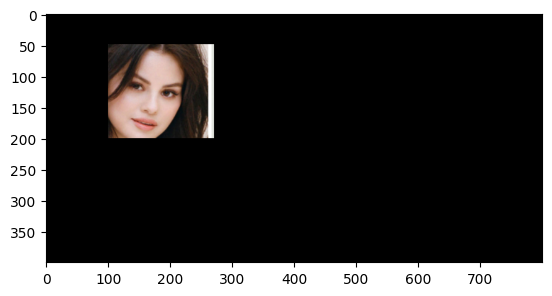

In [47]:
#Aplicar la mascara rectangular
img_mascara_rectangular = cv.bitwise_and(  img, img , mask= mask_rect  )
plt.imshow(img_mascara_rectangular)
plt.show()

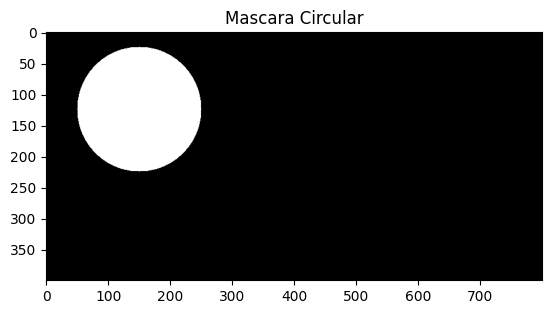

(400, 800, 3)

In [48]:
# Mascara circular y su implementación
mask_circ = np.zeros(img.shape[:2], dtype=np.uint8)
cv.circle(mask_circ, (150,125), 100, 255, -1)
plt.imshow(mask_circ, cmap='gray')
plt.title('Mascara Circular')
plt.show()
img.shape

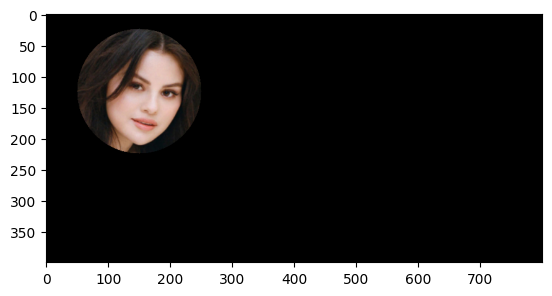

In [49]:
img_mascara_circular = cv.bitwise_and(  img, img , mask= mask_circ  )
plt.imshow(img_mascara_circular)
plt.show()

# 3. Operaciones morfológicas 

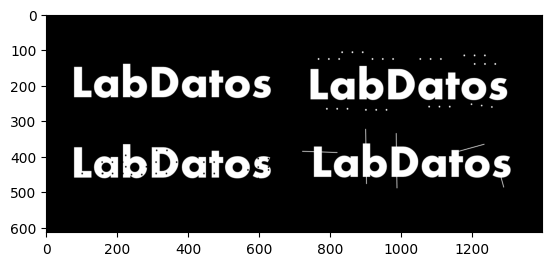

In [50]:
# Imagen figuras/labdatos.png en escala de grises
img = cv.imread('figuras/labdatos.png')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gris, cmap = 'gray')
plt.show()

### Erosión

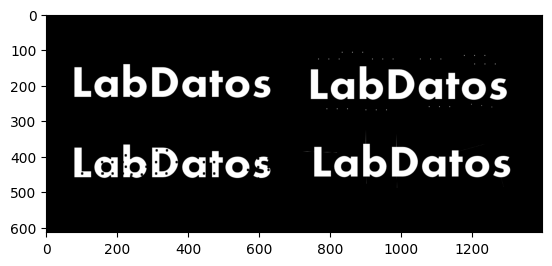

In [51]:
#Erosión
img = cv.imread('figuras/labdatos.png')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_erosion = cv.erode(img_gris, None, iterations= 1)
plt.imshow(img_erosion, cmap = 'gray')
plt.show()

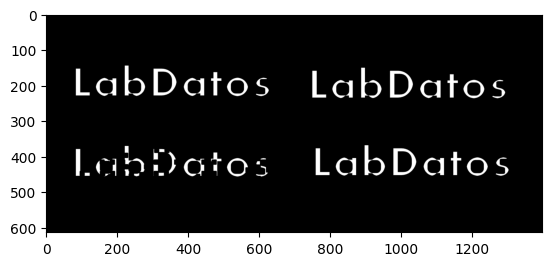

In [52]:
# Varias erosiones
img = cv.imread('figuras/labdatos.png')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_erosion = cv.erode(img_gris, None, iterations= 5)
plt.imshow(img_erosion, cmap = 'gray')
plt.show()

### Dilatación

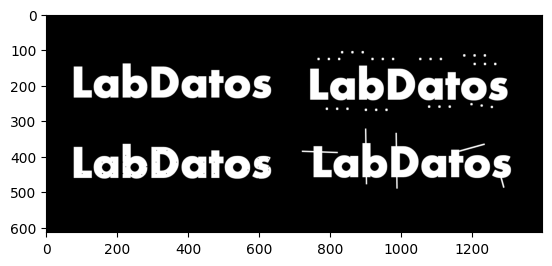

In [53]:
#Dilatación
img = cv.imread('figuras/labdatos.png')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_dilatacion = cv.dilate(img_gris, None, iterations=1)
plt.imshow(img_dilatacion, cmap = 'gray')
plt.show()

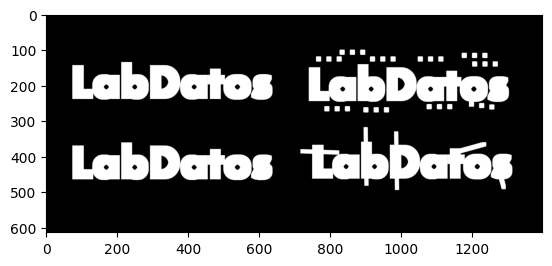

In [54]:
#La dilatación varias veces
img = cv.imread('figuras/labdatos.png')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_dilatacion = cv.dilate(img_gris, None, iterations=5)
plt.imshow(img_dilatacion, cmap = 'gray')
plt.show()

# Opening

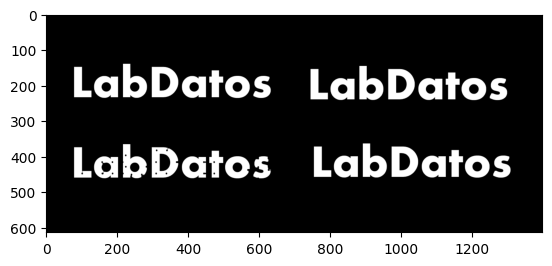

In [55]:
#Opening

img = cv.imread('figuras/labdatos.png')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel = cv.getStructuringElement( cv.MORPH_RECT, (5, 5) )
img_opening = cv.morphologyEx( img_gris, cv.MORPH_OPEN, kernel )

plt.imshow(img_opening, cmap = 'gray')
plt.show()

## Closing

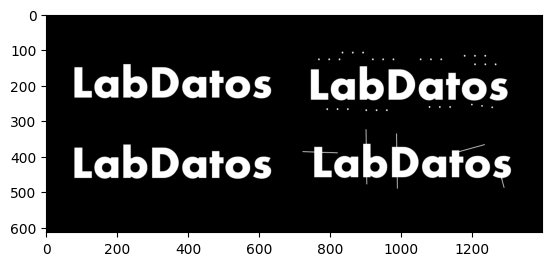

In [56]:
#Closing
img = cv.imread('figuras/labdatos.png')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel = cv.getStructuringElement( cv.MORPH_RECT, (4,6) )
img_closing = cv.morphologyEx( img_gris, cv.MORPH_CLOSE, kernel )

plt.imshow(img_closing, cmap = 'gray')
plt.show()

# Máscara para un rango de color

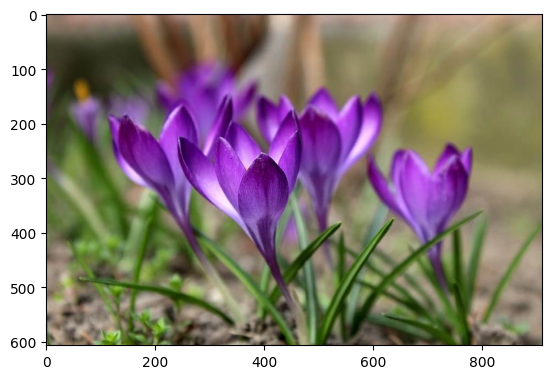

In [57]:
#Mostramos la imagen original
img = cv.imread('figuras/flor_morada.jpg')
img =cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [58]:
#Llevamos a cabo el cambio de espacio de color y definimos los rangos 
#(hMin = 0 , sMin = 0, vMin = 0), (hMax = 11 , sMax = 255, vMax = 255)

img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
inferior = np.array( [101,0,0] )
superior = np.array([ 167,255,255])

In [59]:
#Aplicamos la mascara de la region de color
mascara=cv.inRange(img_hsv, inferior, superior)

In [60]:
# Revisamos los valores de los pixeles
print(img_hsv.shape)
print(mascara.shape)

(607, 910, 3)
(607, 910)


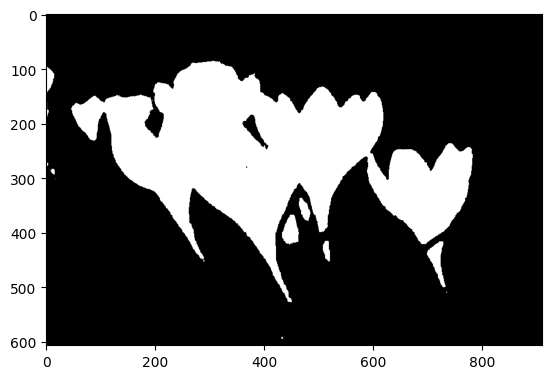

In [61]:
# Visualizamos la mascara
plt.imshow(mascara, cmap='gray')
plt.show()

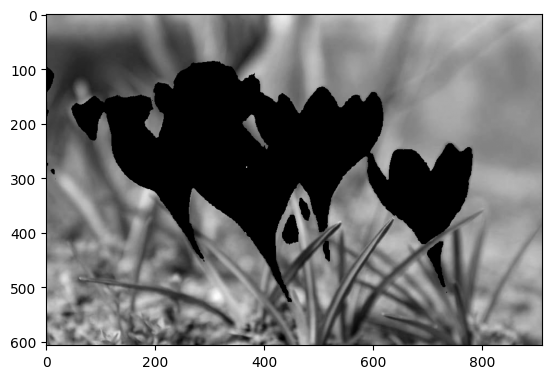

In [69]:
#Obtenemos la imagen en escala de grisis y eliminamos los valores de la mascara
img_gris = cv.cvtColor (img, cv.COLOR_RGB2GRAY)
img_gris_sub = cv.subtract(img_gris, mascara)
plt.imshow(img_gris_sub, cmap = 'grey')
plt.show()

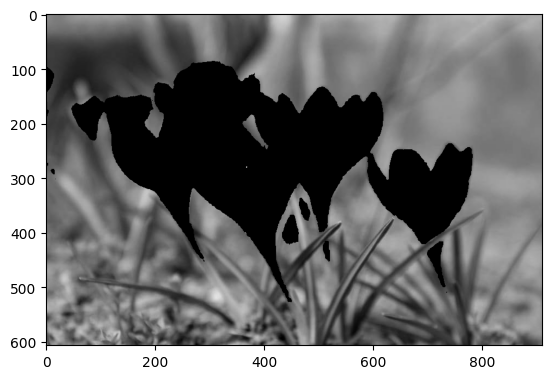

In [70]:
#Convertimos la imagen resultante en RGB
img_gris_sub_rgb = cv.cvtColor (img_gris_sub, cv.COLOR_GRAY2RGB)
plt.imshow(img_gris_sub_rgb)
plt.show()

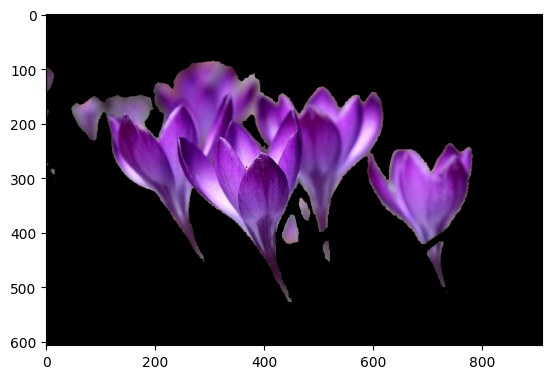

In [71]:
#Obtenemos la mascara aplicada a la imagen real
img_mascara = cv.bitwise_and(img, img, mask=mascara)
plt.imshow(img_mascara)
plt.show()

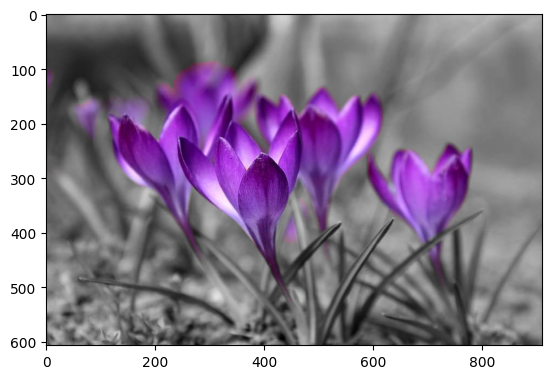

In [73]:
#Resaltando un color en una imagen  
img_add = cv.add(  img_gris_sub_rgb,  img_mascara )
plt.imshow(img_add)
plt.show()